# EN.553.436/636 Midterm 2
### Guidelines:
- The test is open notes and open internet, but do not communicate with anyone/anything, which includes interactions with both humans and AIs, e.g. ChatGPT and Bard.
- Do not **communicate about the exam to anyone or anything** for at least 1 week after the exam is taken.
- **Do not use any messaging or communication** during the exam.
- **Look only at your own screen** when doing the exam. Do not look at other people's work. 

### Time:
- Finish the exam within a **70-minute** time interval. (Students with extra time accomodations should adjust this limit accordingly.)
- **BEFORE LEAVING, UPLOAD THE FOLLOWING**   (The time stamp of your upload is very important.)
    1. **PDF TO GRADESCOPE**
    2. **IPYNB TO CANVAS**
- Students with time accomodation may use the additional alloted time to complete the exam. Gradescope will show "late submission accepted", that window is for you. You will not be penalized for "late submission".

### Remark:
- Some questions ask for text responses. The graders will be looking for **brief, incisive** remarks that indicate depth of understanding.

# <span style="color:red"> Honor Statement: </span>
I have read the above instructions before starting my exam and agree to follow it. 
### Signature: [TYPE YOUR NAME HERE.]
### Start Time:
### End Time: 

## 0 Load Data

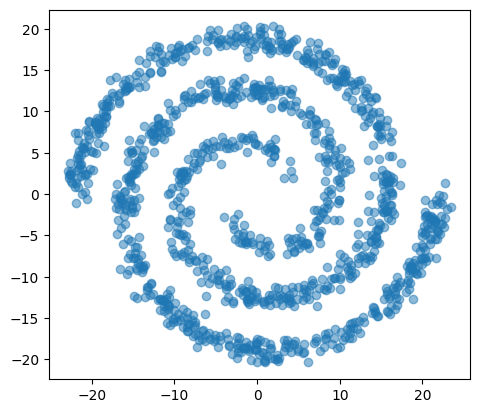

In [1]:
# ----- DO NOT CHANGE THIS CODE -----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data1 = pd.read_csv("problem1_2.csv").to_numpy()
X, y = data1[:,0:2], data1[:,2]

colormap = ListedColormap(['#FF0000', '#0000FF'])
plt.subplot(aspect='equal')
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.show()

## 1 Clustering
Gertrude was doing spectral clustering and copy-pasted some code she found. Help her debug to get a correct implementation of (simple, unweighted Laplacian) spectral clustering on the first non-trivial eigenvector.

There are 3 segments to the code implementation of spectral clustering below, indicated accordingly. 

First, run the code cell below.

### 1.1 [3 pt] Debug

There is exactly one error in each segment, i.e., a total of 3 errors in the entire code cell below. Fix them. There should not be any need to add/delete new lines of code.

### 1.2 [3 pt] Comment code

For each segment, summarize in <u>1 phrase/sentence</u> what the code is doing/how it fits into the implementation of spectral clustering. 
- Write your comment next to "COMMENT i:  ".
- Separate your comment into as many lines as necessary, so that when you render your PDF for submission, the graders can see all your comments.
- We are looking for brief, incisive remarks that indicate your understanding of the methods.

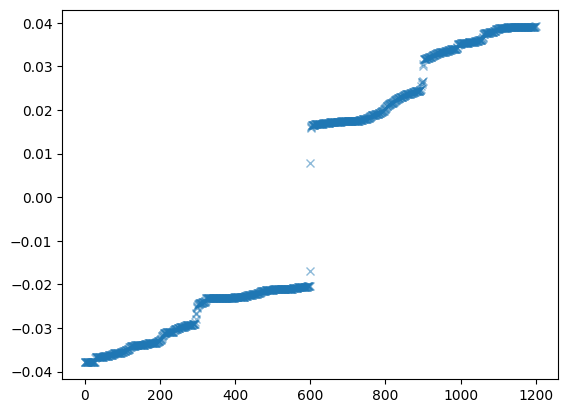

In [4]:
# --------     SEGMENT 1     ---------
# COMMENT 1: This code calculates the squared distance between each pair of points in the dataset 
residual = X[np.newaxis,:,:] - X[:,np.newaxis,:]
squared_dist = np.sum(residual**2, axis=2)

# ------------------------------------

# --------     SEGMENT 2     ---------
# COMMENT 2: # This code calculates the adjacency matrix A, the degree matrix D, and the Laplacian matrix L 
A = (squared_dist < 5).astype(np.float32)
np.fill_diagonal(A,0)
dd = A.sum(axis=0)
D = np.diag(dd)
L = D - A

# ------------------------------------

# --------     SEGMENT 3     ---------
# COMMENT 3: # TODO
w, v = np.linalg.eigh(L) 
evec = v[:,1]
s = np.argsort(evec)

# ------------------------------------


# ----- DO NOT CHANGE THIS CODE ------
plt.plot(evec[s], 'x', alpha=0.5)
plt.show()
# ------------------------------------


### 1.3 [3 pt] Cluster entries of first non-trivial eigenvector
Using k-means or gaussian mixture model, cluster the entries of the first non-trivial eigenvector. Store the computed labels as `labels`.
- You can use sklearn packages.

In [7]:
# TODO clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(evec.reshape(-1,1))
labels = kmeans.labels_

### 1.4 [1 pt] Plot clusters
Using the labels obtained from your choice of clustering method, plot a new figure of the spiral data with your computed cluster labels. Code is given to you.

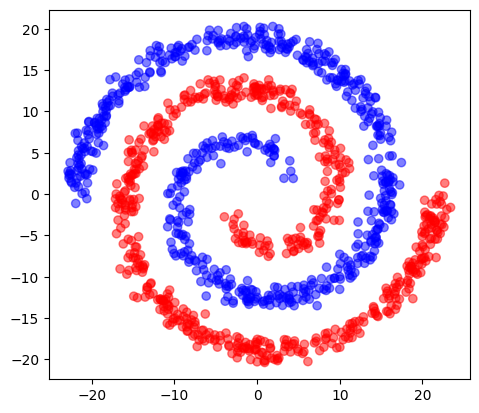

In [8]:
plt.subplot(aspect='equal')
plt.scatter(X[:,0], X[:,1], c=labels, cmap=colormap, alpha=0.5)
plt.show()

## 2 Classification
Consider these two classification models:

1. [3 pt] **Logistic Regression**
2. [3 pt] **K Nearest Neighbors**

For each classification model above:
- Define the models
    - Logistic regression: set l2 penalty and C = 1
    - k nearest neighbors: set number of neighbors = 5
- Fit the model to the training data.
- Score the model on the test data.
- Print the accuracy of the model.

You may need to import relevant sklearn packages. The train-test split has been given to you.

In [9]:
# ------------ DO NOT CHANGE THIS CODE  --------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

### 2.1 [3 pt] Logistic Regression

In [12]:
# TODO

"""
## 2 Classification
Consider these two classification models:

1. [3 pt] **Logistic Regression**
2. [3 pt] **K Nearest Neighbors**

For each classification model above:
- Define the models
    - Logistic regression: set l2 penalty and C = 1
    - k nearest neighbors: set number of neighbors = 5
- Fit the model to the training data.
- Score the model on the test data.
- Print the accuracy of the model.

You may need to import relevant sklearn packages. The train-test split has been given to you.
"""

# TODO Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=1)
logreg.fit(X_train, y_train)
accuracy_logreg = logreg.score(X_test, y_test)
print(f"Logistic Regression accuracy: {accuracy_logreg}")

Logistic Regression accuracy: 0.6125


### 2.2 [3 pt] K Nearest Neighbors

In [ ]:
# TODO

"""
## 2 Classification
Consider these two classification models:

1. [3 pt] **Logistic Regression**
2. [3 pt] **K Nearest Neighbors**

For each classification model above:
- Define the models
    - Logistic regression: set l2 penalty and C = 1
    - k nearest neighbors: set number of neighbors = 5
- Fit the model to the training data.
- Score the model on the test data.
- Print the accuracy of the model.

You may need to import relevant sklearn packages. The train-test split has been given to you.
"""

# TODO K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy_knn = knn.score(X_test, y_test)
print(f"K Nearest Neighbors accuracy: {accuracy_knn}")

### 2.3 [2 pt] Discuss accuracy of models
Which classification method has the higher accuracy? Based on your understanding of how Logistic Regression and K Nearest Neighbors works, how can you explain the differences in accuracy?

**Ans:** (type response here)


## 3 kNN on new data set 
Consider the data below. Run the cells to see it.

[3 pt] Based on your knowledge of how the kNN works with **5 neighbors**, explain the shape of the decision boundary.

**Ans:** (type response here)

In [ ]:
# -----  DO NOT CHANGE THIS CODE -----
# load data
pl_data = pd.read_csv("problem3.csv").to_numpy()
X_train_pl, y_train_pl = pl_data[:,0:2], pl_data[:,2]

# fit knn model and compute decision boundary
from sklearn.neighbors import KNeighborsClassifier
knn_model_pl = KNeighborsClassifier(n_neighbors=5).fit(X_train_pl, y_train_pl)

h = 0.01
xx,yy = np.meshgrid(np.arange(X_train_pl[:,0].min()-.5, X_train_pl[:,0].max()+.5, h),
                  np.arange(X_train_pl[:,1].min()-.5, X_train_pl[:,1].max()+.5, h))
zz = knn_model_pl.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

In [ ]:
# -----  DO NOT CHANGE THIS CODE -----
# plot
plt.figure(figsize=(10,5))

plt.subplot(121, aspect='equal')
plt.scatter(X_train_pl[:,0], X_train_pl[:,1], c=y_train_pl, cmap=colormap)
plt.xlim([xx.min(), xx.max()]); plt.ylim([yy.min(), yy.max()])
plt.title('Data with true labels')

plt.subplot(122, aspect='equal')
plt.contourf(xx,yy,zz,cmap=plt.cm.Paired)
plt.scatter(X_train_pl[:,0], X_train_pl[:,1], c=y_train_pl, cmap=colormap)
plt.title('kNN decision boundary')

plt.show()

# END OF MIDTERM 2